In [1]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
plt.style.use('ggplot')

pd.options.display.max_columns = 30

# Load data

In [2]:
data = pd.read_excel('data/ft_load_sul_15y_days.xlsx')
data = data[['Data Escala de Tempo 1 CE Simp 4', 'Selecione Tipo de CE Simp 4']]
data.columns = ['date','load']
data = data[2:]
data.shape

(5995, 2)

In [3]:
data.iloc[np.r_[0:2, -2:0]]

,date,load
2,2005-01-01 00:00:00,134.95552
3,2005-02-01 00:00:00,140.24240
5995,05/30/2021 12:00:00 a.m.,209.56636
5996,05/31/2021 12:00:00 a.m.,276.47700


In [4]:
init_date = datetime(2005, 1, 1)
datelist = pd.date_range(init_date, periods=len(data)).tolist()

In [5]:
df = pd.DataFrame(data=data.load.values, index=datelist, columns=['Energy_Load'])
df.iloc[np.r_[0:2, -2:0]]

,Energy_Load
2005-01-01,134.95552
2005-01-02,140.24240
2021-05-30,209.56636
2021-05-31,276.47700


In [6]:
df[df.Energy_Load.isnull()]

,Energy_Load
2014-02-01,NaN


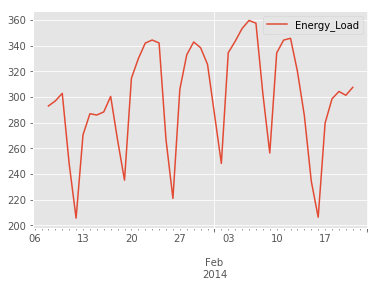

In [7]:
df.loc['2014-02-01','Energy_Load'] = (325.547854 + 248.323577)/2.
df.loc['2014-01-08':'2014-02-21'].plot()

In [8]:
df1 = df.resample('1M').sum()[['Energy_Load']]
df1['date'] = df1.index
df1['year'] = df1.date.dt.year
df1['month'] = df1.date.dt.month
df1.shape

(197, 4)

In [9]:
df1.iloc[np.r_[0:3, -3:0]]

,Energy_Load,date,year,month
2005-01-31,5812.802010,2005-01-31,2005,1
2005-02-28,5400.981390,2005-02-28,2005,2
2005-03-31,6082.353690,2005-03-31,2005,3
2021-03-31,9614.946489,2021-03-31,2021,3
2021-04-30,8606.498493,2021-04-30,2021,4
2021-05-31,8463.734421,2021-05-31,2021,5


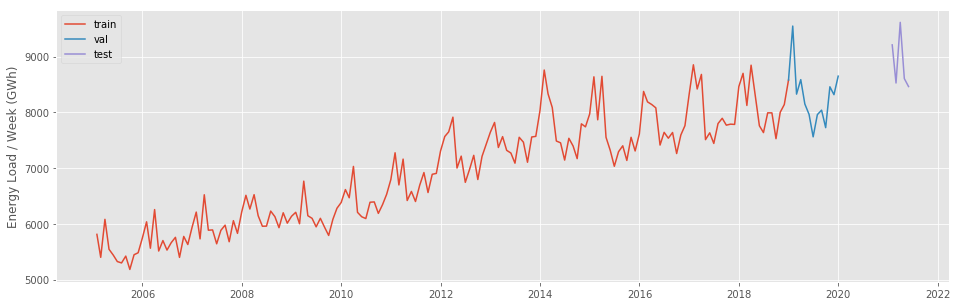

In [10]:
plt.figure(figsize=[16,5])
plt.plot(df1.loc['2005-01-01':'2018-12-31','Energy_Load'], label="train")
plt.plot(df1.loc['2018-12-31':'2019-12-31','Energy_Load'], label="val")
plt.plot(df1.loc['2021-01-01':'2021-05-31','Energy_Load'], label="test")
plt.legend()
plt.ylabel('Energy Load / Week (GWh)')
plt.show()

### Train-test split

In [11]:
df1['Energy_Load_diff'] = df1.Energy_Load.diff().values
df1['Energy_Load'] = df1['Energy_Load'].shift(1).values
df1 = df1.iloc[1:,:]
df1.head()

,Energy_Load,date,year,month,Energy_Load_diff
2005-02-28,5812.80201,2005-02-28,2005,2,-411.820620
2005-03-31,5400.98139,2005-03-31,2005,3,681.372300
2005-04-30,6082.35369,2005-04-30,2005,4,-536.923569
2005-05-31,5545.43012,2005-05-31,2005,5,-103.832590
2005-06-30,5441.59753,2005-06-30,2005,6,-116.372100


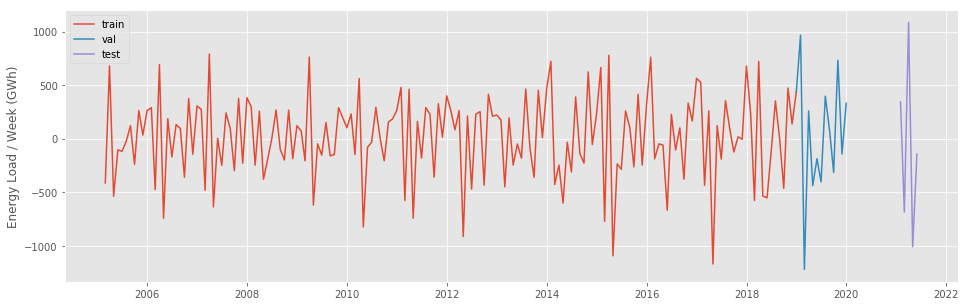

In [12]:
plt.figure(figsize=[16,5])
plt.plot(df1.loc['2005-01-01':'2018-12-31','Energy_Load_diff'], label="train")
plt.plot(df1.loc['2018-12-31':'2019-12-31','Energy_Load_diff'], label="val")
plt.plot(df1.loc['2021-01-01':'2021-05-31','Energy_Load_diff'], label="test")
plt.legend()
plt.ylabel('Energy Load / Week (GWh)')
plt.show()

In [13]:
windows = 3

In [14]:
train = df1.loc['2005-01-01':'2018-12-31']
print(train.shape)
train.iloc[np.r_[0:2, -2:0]]

(167, 5)


,Energy_Load,date,year,month,Energy_Load_diff
2005-02-28,5812.802010,2005-02-28,2005,2,-411.820620
2005-03-31,5400.981390,2005-03-31,2005,3,681.372300
2018-11-30,8002.382604,2018-11-30,2018,11,138.569433
2018-12-31,8140.952037,2018-12-31,2018,12,439.389860


In [15]:
val = pd.concat([train.iloc[-12:], df1.loc['2019-01-01':'2019-12-31'] ], axis=0)
print(val.shape)
val.iloc[np.r_[0:6, -2:0]]

(24, 5)


,Energy_Load,date,year,month,Energy_Load_diff
2018-01-31,8463.833418,2018-01-31,2018,1,236.929734
2018-02-28,8700.763152,2018-02-28,2018,2,-576.253257
2018-03-31,8124.509895,2018-03-31,2018,3,722.512087
2018-04-30,8847.021982,2018-04-30,2018,4,-535.449611
2018-05-31,8311.572371,2018-05-31,2018,5,-551.374794
2018-06-30,7760.197577,2018-06-30,2018,6,-122.224508
2019-11-30,8459.319181,2019-11-30,2019,11,-141.514480
2019-12-31,8317.804701,2019-12-31,2019,12,332.264984


In [16]:
year2020 = df1[df1.year==2020]
year2019 = df1[df1.year==2019]
# test = pd.concat([year2020.iloc[-windows:], df1.loc['2021-01-01':'2021-05-31'] ], axis=0)
test = pd.concat([year2019, df1.loc['2021-01-01':'2021-05-31'] ], axis=0)
print(test.shape)
test.iloc[np.r_[0:3, -2:0]]

(17, 5)


,Energy_Load,date,year,month,Energy_Load_diff
2019-01-31,8580.341897,2019-01-31,2019,1,968.123912
2019-02-28,9548.465809,2019-02-28,2019,2,-1220.618583
2019-03-31,8327.847226,2019-03-31,2019,3,259.941544
2021-04-30,9614.946489,2021-04-30,2021,4,-1008.447996
2021-05-31,8606.498493,2021-05-31,2021,5,-142.764072


## Data Pre-Processing

**Inputs:**
- windows values
- month -> one-hot (11)  //  binary (4)
- x (t-12)

In [17]:
lt_w = ['x[t-{}]'.format(str(i)) for i in reversed(range(1, windows+1))]
cols = ['m[0]', 'm[1]', 'm[2]', 'm[3]', 'x[t-12]'] + lt_w + ['x[t]']

def preprocess(df_, t=12, scale=False):
    '''
    t: datos del mes T-t
    
    Return:
    _X: df preprocesado
    _save: valores para reescalar datos
    '''
    
    _xt = []
    _save = []
    for i in range(12, len(df_)):
        _y = df_.iloc[i]
        _m = _y.month
        _m = [float(i) for i in np.binary_repr(_m, width=4)]
        _xt_w = list(df_.iloc[i-windows:i].Energy_Load_diff.values)
        _xt_12 = df_.iloc[i-12].Energy_Load_diff

        _x = _m + [_xt_12] + _xt_w + [_y.Energy_Load_diff]
        _xt.append(_x)
        
        _save.append(_y.Energy_Load)
        
    _X = pd.DataFrame(_xt, columns=cols)
    
    if scale:
        _X.iloc[:,4:] = (_X.iloc[:,4:] - min_)/(max_ - min_)
    
    return _X, _save

In [18]:
X, xt  = preprocess(train)
max_ = np.max(X.iloc[:,4:].values)
min_ = np.min(X.iloc[:,4:].values)

print(max_, min_)

791.2898899999991 -1169.588267


In [19]:
X.iloc[:,4:] = (X.iloc[:,4:] - min_)/(max_ - min_)
X.head()

,m[0],m[1],m[2],m[3],x[t-12],x[t-3],x[t-2],x[t-1],x[t]
0,0.0,0.0,1.0,0.0,0.386443,0.614551,0.731240,0.744686,0.354995
1,0.0,0.0,1.0,1.0,0.943945,0.731240,0.744686,0.354995,0.949793
2,0.0,1.0,0.0,0.0,0.322644,0.744686,0.354995,0.949793,0.217536
3,0.0,1.0,0.0,1.0,0.543509,0.354995,0.949793,0.217536,0.692057
4,0.0,1.0,1.0,0.0,0.537115,0.949793,0.217536,0.692057,0.509451


In [20]:
Xval, xv = preprocess(val, scale=True)
Xval.head()

,m[0],m[1],m[2],m[3],x[t-12],x[t-3],x[t-2],x[t-1],x[t]
0,0.0,0.0,0.0,1.0,0.717290,0.838076,0.667128,0.820540,1.090181
1,0.0,0.0,1.0,0.0,0.302586,0.667128,0.820540,1.090181,-0.026024
2,0.0,0.0,1.0,1.0,0.964925,0.820540,1.090181,-0.026024,0.729025
3,0.0,1.0,0.0,0.0,0.323395,1.090181,-0.026024,0.729025,0.373296
4,0.0,1.0,0.0,1.0,0.315274,-0.026024,0.729025,0.373296,0.501822


In [21]:
Xtest, xte = preprocess(test, scale=True)
Xtest.head()

,m[0],m[1],m[2],m[3],x[t-12],x[t-3],x[t-2],x[t-1],x[t]
0,0.0,0.0,0.0,1.0,1.090181,0.970223,0.524293,0.765909,0.772105
1,0.0,0.0,1.0,0.0,-0.026024,0.524293,0.765909,0.772105,0.247609
2,0.0,0.0,1.0,1.0,0.729025,0.765909,0.772105,0.247609,1.151142
3,0.0,1.0,0.0,0.0,0.373296,0.772105,0.247609,1.151142,0.082178
4,0.0,1.0,0.0,1.0,0.501822,0.247609,1.151142,0.082178,0.523655


In [22]:
x_train = X.values[:,:-1]
y_train = X.values[:,-1]

x_val = Xval.values[:,:-1]
y_val = Xval.values[:,-1] # y[t+1]

x_test = Xtest.values[:,:-1]
y_test = Xtest.values[:,-1] # y[t+1]

# Model

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [24]:
def create_model(hidden_neurons=[4], lr=0.05, n_input=1):
    tf.set_random_seed(42)
    model = Sequential()
    model.add(Dense(hidden_neurons[0], input_dim=n_input, activation='relu'))
    for i in range(1,len(hidden_neurons)):
        model.add(Dense(hidden_neurons[i], input_dim=hidden_neurons[i-1], activation='relu'))
    model.add(Dense(1))
    opt = Adam(learning_rate=lr)
    model.compile(loss='mean_absolute_error', optimizer=opt, metrics=['mean_squared_error'])
    return model

In [25]:
def calculate_metrics(y_true, y_predict, rescaling=True, x_resc=None):
    '''
    x_resc: valores para reescalar
    '''
    
    if rescaling:
        y_true = y_true*(max_ - min_) + min_ + x_resc
        y_predict = y_predict*(max_ - min_) + min_ + x_resc

    mae_error = mean_absolute_error(y_true, y_predict)
    mse_error = mean_squared_error(y_true, y_predict)
    rmse_error = np.sqrt(mse_error)
    mape = np.mean(np.abs((y_true.ravel() - y_predict.ravel()) / y_true.ravel())) * 100


    print(f'Erro MAE = {round(mae_error,3)}\nErro RMSE = {round(rmse_error,3)}')
    print("MAPE: ", np.round(mape,3), "%")

In [26]:
def multistep(x_, y_, model_, mode="binary"):

    yp = []
    
    if mode=="binary":
        L=4
    elif mode=="Nof1":
        L=12

    input_ = np.copy(x_)
    input_ = np.expand_dims(input_[0], axis=0)

    for i in range(len(x_)):
        yt_ = model_.predict(input_)[0][0]
        yp.append(yt_)
        
        if i < len(x_)-1:
            # update input
            input_[0,:L] = x_[i+1,:L] # copy binary part
            input_[0,L:-1] = input_[0,(L+1):]
            input_[0,-1] = yt_

    return np.array(yp)

In [59]:
hn = 25
ep = 100

model1 = create_model(hidden_neurons = [hn], n_input = x_train.shape[1], lr = 0.001)

In [60]:
hs1 = model1.fit(x=x_train, y=y_train, epochs=ep,
                 validation_data=(x_val, y_val))

Train on 155 samples, validate on 12 samples
Epoch 1/100
155/155 [==============================] - 0s 981us/sample - loss: 0.5890 - mean_squared_error: 0.4431 - val_loss: 0.5139 - val_mean_squared_error: 0.3958
Epoch 2/100
155/155 [==============================] - 0s 71us/sample - loss: 0.4839 - mean_squared_error: 0.3244 - val_loss: 0.4127 - val_mean_squared_error: 0.2936
Epoch 3/100
155/155 [==============================] - 0s 90us/sample - loss: 0.3861 - mean_squared_error: 0.2312 - val_loss: 0.3389 - val_mean_squared_error: 0.2188
Epoch 4/100
155/155 [==============================] - 0s 84us/sample - loss: 0.2981 - mean_squared_error: 0.1598 - val_loss: 0.2794 - val_mean_squared_error: 0.1658
Epoch 5/100
155/155 [==============================] - 0s 84us/sample - loss: 0.2386 - mean_squared_error: 0.1118 - val_loss: 0.2651 - val_mean_squared_error: 0.1343
Epoch 6/100
155/155 [==============================] - 0s 94us/sample - loss: 0.2166 - mean_squared_error: 0.0846 - val_loss

Epoch 50/100
155/155 [==============================] - 0s 71us/sample - loss: 0.0923 - mean_squared_error: 0.0151 - val_loss: 0.1401 - val_mean_squared_error: 0.0451
Epoch 51/100
155/155 [==============================] - 0s 77us/sample - loss: 0.0918 - mean_squared_error: 0.0150 - val_loss: 0.1387 - val_mean_squared_error: 0.0445
Epoch 52/100
155/155 [==============================] - 0s 84us/sample - loss: 0.0911 - mean_squared_error: 0.0147 - val_loss: 0.1386 - val_mean_squared_error: 0.0437
Epoch 53/100
155/155 [==============================] - 0s 84us/sample - loss: 0.0907 - mean_squared_error: 0.0145 - val_loss: 0.1387 - val_mean_squared_error: 0.0431
Epoch 54/100
155/155 [==============================] - 0s 77us/sample - loss: 0.0901 - mean_squared_error: 0.0144 - val_loss: 0.1362 - val_mean_squared_error: 0.0423
Epoch 55/100
155/155 [==============================] - 0s 77us/sample - loss: 0.0896 - mean_squared_error: 0.0143 - val_loss: 0.1360 - val_mean_squared_error: 0.041

155/155 [==============================] - 0s 81us/sample - loss: 0.0775 - mean_squared_error: 0.0112 - val_loss: 0.1266 - val_mean_squared_error: 0.0302
Epoch 100/100
155/155 [==============================] - 0s 77us/sample - loss: 0.0772 - mean_squared_error: 0.0112 - val_loss: 0.1265 - val_mean_squared_error: 0.0299


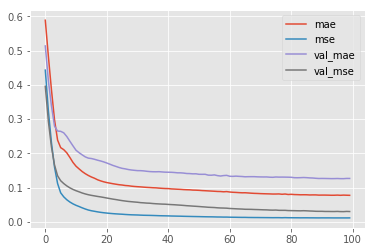

In [61]:
plt.plot(hs1.history['loss'], label="mae")
plt.plot(hs1.history['mean_squared_error'], label="mse")
plt.plot(hs1.history['val_loss'], label="val_mae")
plt.plot(hs1.history['val_mean_squared_error'], label="val_mse")
plt.legend()
plt.show()

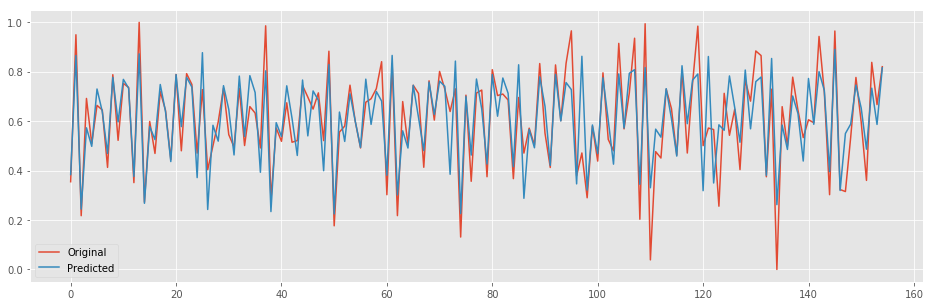

In [62]:
y_train_hat = model1.predict(x_train)

plt.figure(figsize=[16,5])
plt.plot(y_train)
plt.plot(y_train_hat)
plt.legend(['Original','Predicted'])

In [63]:
y_val_ms = multistep(x_val, y_val, model1)

In [64]:
calculate_metrics(y_val, y_val_ms, x_resc=xv)

Erro MAE = 308.622
Erro RMSE = 406.714
MAPE:  3.651 %


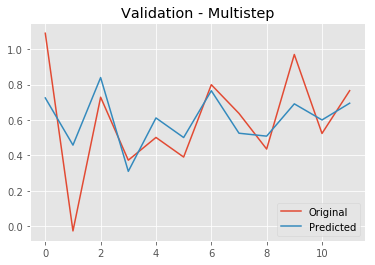

In [65]:
plt.plot(y_val)
plt.plot(y_val_ms)
plt.legend(['Original','Predicted'])
plt.title('Validation - Multistep')
plt.show()

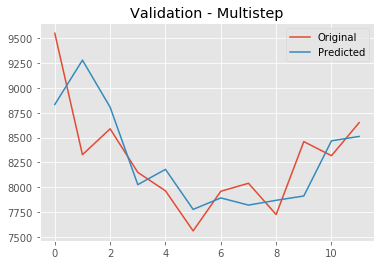

In [66]:
plt.plot(y_val*(max_ - min_) + min_ + xv)
plt.plot(y_val_ms*(max_ - min_) + min_ + xv)
plt.legend(['Original','Predicted'])
plt.title('Validation - Multistep')
plt.show()

# Testing

In [67]:
y_test_hat = model1.predict(x_test)
y_test_ms = multistep(x_test, y_test, model1)

In [68]:
calculate_metrics(y_test, y_test_ms, x_resc=xte)

Erro MAE = 371.966
Erro RMSE = 410.943
MAPE:  4.149 %


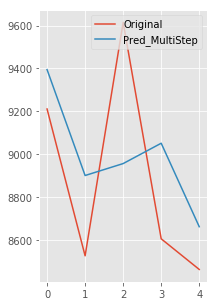

In [69]:
plt.figure(figsize=[3,5])
plt.plot(y_test*(max_ - min_) + min_ + xte)
# plt.plot(y_test_hat*(max_ - min_) + min_ + xte)
plt.plot(y_test_ms*(max_ - min_) + min_ + xte)
plt.legend(['Original', 'Pred_MultiStep'])
plt.show()

In [110]:
# file_sav = 'res/bs_hn{}_ep{}.h5'.format(hn, ep)
# model1.save_weights(file_sav)